# Core Concepts

```{contents}
---
depth: 3
local: true
backlinks: none
---
```

These are the core concepts for Merlin that will help you understand the how the libraries work

## The Merlin Graph


/Users/alaiacano/.pyenv/versions/3.8.13/envs/merlin38/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


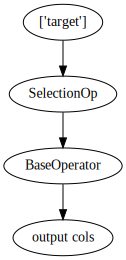

In [1]:
from merlin.dag import Graph, BaseOperator

output = ["target"] >> BaseOperator()
output.graph

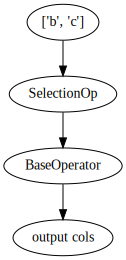

In [2]:
output2 = ["b", "c"] >> BaseOperator()
output2.graph

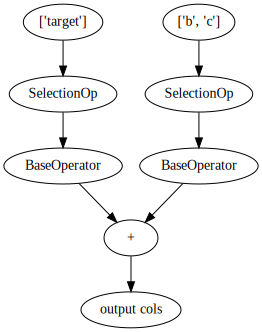

In [3]:
combined = output + output2
combined.graph

### Input and Output Schemas

The `Graph` can learn its input and output schemas when you provide it with the Schema of the data that enters the graph.

In [7]:
from merlin.schema import Schema, ColumnSchema
import numpy as np

# The schema of the data that we expect to pass through the graph.
root_schema = Schema(
    column_schemas=[
        ColumnSchema(name="target", dtype=str),
        ColumnSchema(name="b", dtype=np.int32),
        ColumnSchema(name="c", dtype=np.int16),
        ColumnSchema(name="d"),
    ]
)

g = Graph(combined)
g.construct_schema(root_schema)
g.input_schema

,name,tags,dtype,is_list,is_ragged
0,target,(),<U0,False,False
1,b,(),int32,False,False
2,c,(),int16,False,False


Merlin will validate that the input schema has all of the fields that the Graph expects, and throw a `ValueError` if expected fields are missing.

In [12]:
root_schema = Schema(
    column_schemas=[
        ColumnSchema(name="target", dtype=str),
    ]
)

nodes = ["target", "col2", "col3"] >> BaseOperator()
g = Graph(nodes)

# The graph expects to find columns called 'col2' and 'col3' that are not in the root_schema!
g.construct_schema(root_schema)

ValueError: Missing columns ['col2', 'col3'] found in operatorSelectionOp during compute_selector.

It is not common to need to hand-craft a `Schema`. Merlin is able to determine and propagate schemas. For example, creating a `merlin.io.Dataset` will infer a schema from your DataFrame.

In [13]:
from merlin.io import Dataset
import pandas as pd

ds = Dataset(
    pd.DataFrame(
        {
            "target": [1.0, 0.0, 1.0],
            "b": ["a", "b", "c"],
            "c": [1, 2, 3],
            "d": [4, 5, 6],
        }
    )
)

g = Graph(combined)
g.construct_schema(ds.schema)
g.input_schema

/Users/alaiacano/.pyenv/versions/3.8.13/envs/merlin38/lib/python3.8/site-packages/merlin/io/dataset.py:253: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


,name,tags,dtype,is_list,is_ragged
0,target,(),float64,False,False
1,b,(),object,False,False
2,c,(),int64,False,False


In [14]:
import pandas as pd
from merlin.io import Dataset
from nvtabular.workflow import Workflow
ds = Dataset(
    pd.DataFrame(
        {
            "target": [1.0, 0.0, 1.0],
            "b": ["a", "b", "c"],
            "c": [1, 2, 3],
            "d": [4, 5, 6],
        }
    )
)

wf = Workflow(combined)

wf.fit(ds)

wf.graph.input_schema


/Users/alaiacano/.pyenv/versions/3.8.13/envs/merlin38/lib/python3.8/site-packages/merlin/io/dataset.py:253: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


,name,tags,dtype,is_list,is_ragged
0,target,(),float64,False,False
1,b,(),object,False,False
2,c,(),int64,False,False


## Operators



## Schemas



## Shapes and Dtypes
